This notebook is for the implementation and check of the haar wavelet function.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Define a function to calculate the index
def index(i):
    """
    Calculate the step-value of the i-th Haar wavelet
    """
    j = int(np.ceil(np.log2(i))) - 1
    k = int(i - 2 ** j) - 1
    return j, k

In [5]:
# define the Haar wavelet function for input is a vector
def haar_vec(x, i):
    """
    x: input vector
    i: the index of the Haar wavelet function

    return: the Haar wavelet function
    """
    if i == 1:
        return np.ones(len(x))
    if i >= 2:
        j, k = index(i) # j is the scale, k is the translation
        m = 2 ** j
        alpha = k / m
        beta = (k + 0.5) / m
        gamma = (k + 1) / m
        a = 1. * (x>=alpha) * (x<beta) 
        b = -1 * (x>=beta) * (x<=gamma)
        c = a + b
        return c

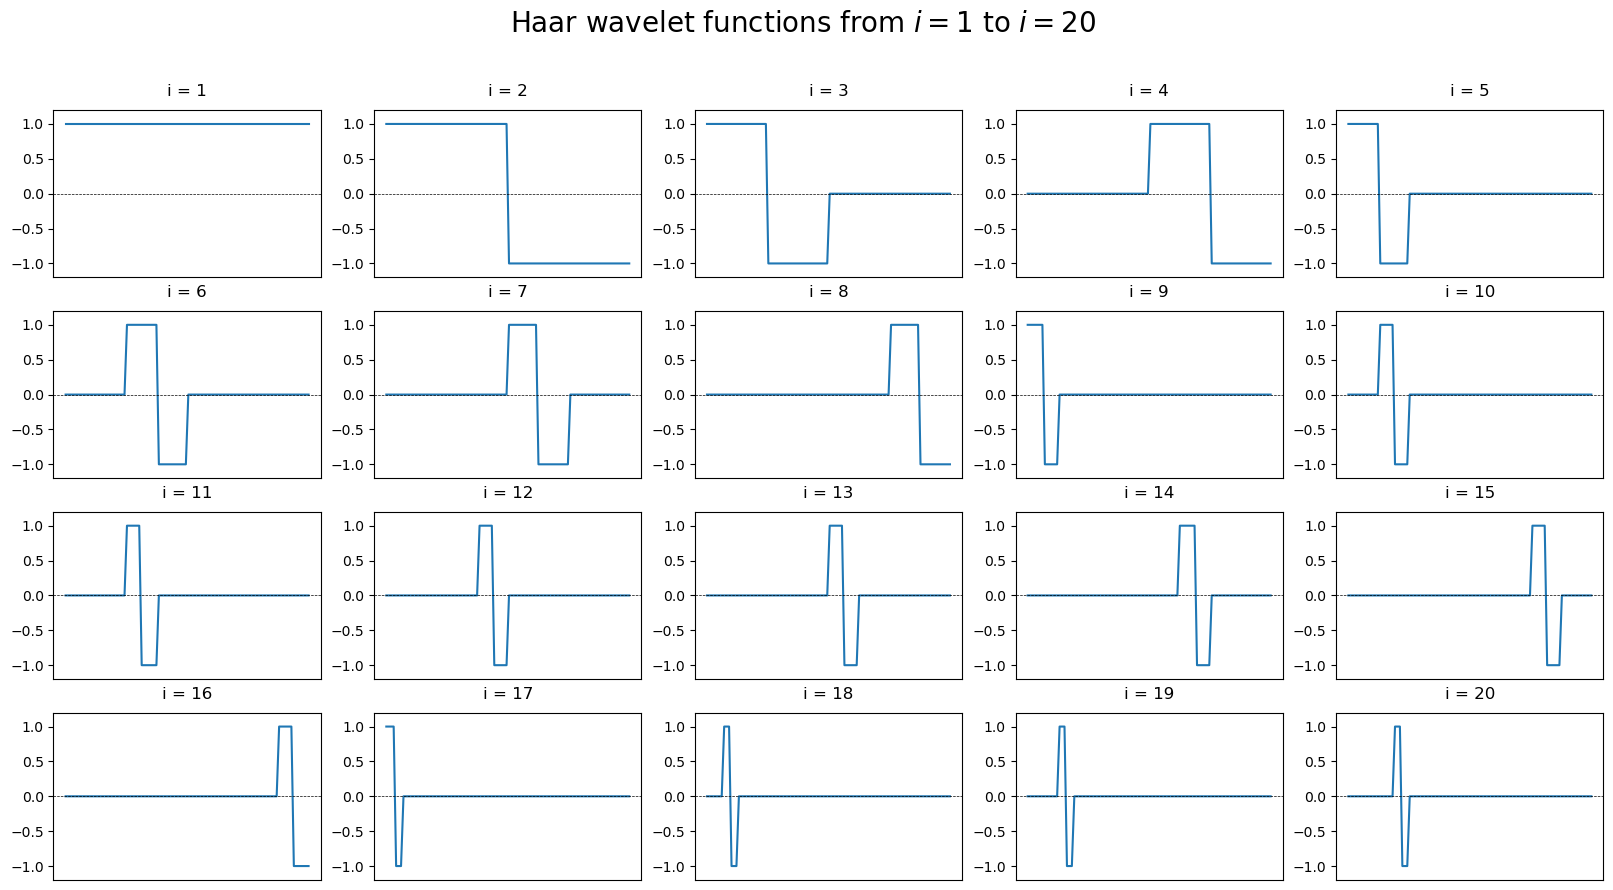

In [6]:
# plot the Haar wavelet function
fig, ax = plt.subplots(4, 5, figsize=(20, 10))
x = np.linspace(0, 1, 100)
for i in range(1, 21):
    ax[int((i - 1) / 5), (i - 1) % 5].plot(x, haar_vec(x, i))
    ax[int((i - 1) / 5), (i - 1) % 5].get_xaxis().set_visible(False) # make x-axis do not show
    ax[int((i - 1) / 5), (i - 1) % 5].set_title('i = ' + str(i), pad=10)
    ax[int((i - 1) / 5), (i - 1) % 5].set_ylim(-1.2, 1.2)
    ax[int((i - 1) / 5), (i - 1) % 5].axhline(y=0, color='k', linewidth=0.5, linestyle='--')
fig.suptitle('Haar wavelet functions from $i = 1$ to $i = 20$', fontsize=20)
plt.show()

In [7]:
# define the function for first-order integration of the Haar wavelet function
def haar_int_1(x, i):
    """
    x: input vector
    i: the index of the Haar wavelet function

    return: the integration of the Haar wavelet function
    """
    if i == 1:
        return x
    if i >= 2:
        j, k = index(i) # j is the scale, k is the translation
        m = 2 ** j
        alpha = k / m
        beta = (k + 0.5) / m
        gamma = (k + 1) / m
        a = 1. * (x>=alpha) * (x<beta)
        b = -1. * (x>=beta) * (x<=gamma)
        c = a * (x - alpha) + b * (x - gamma)
        return c

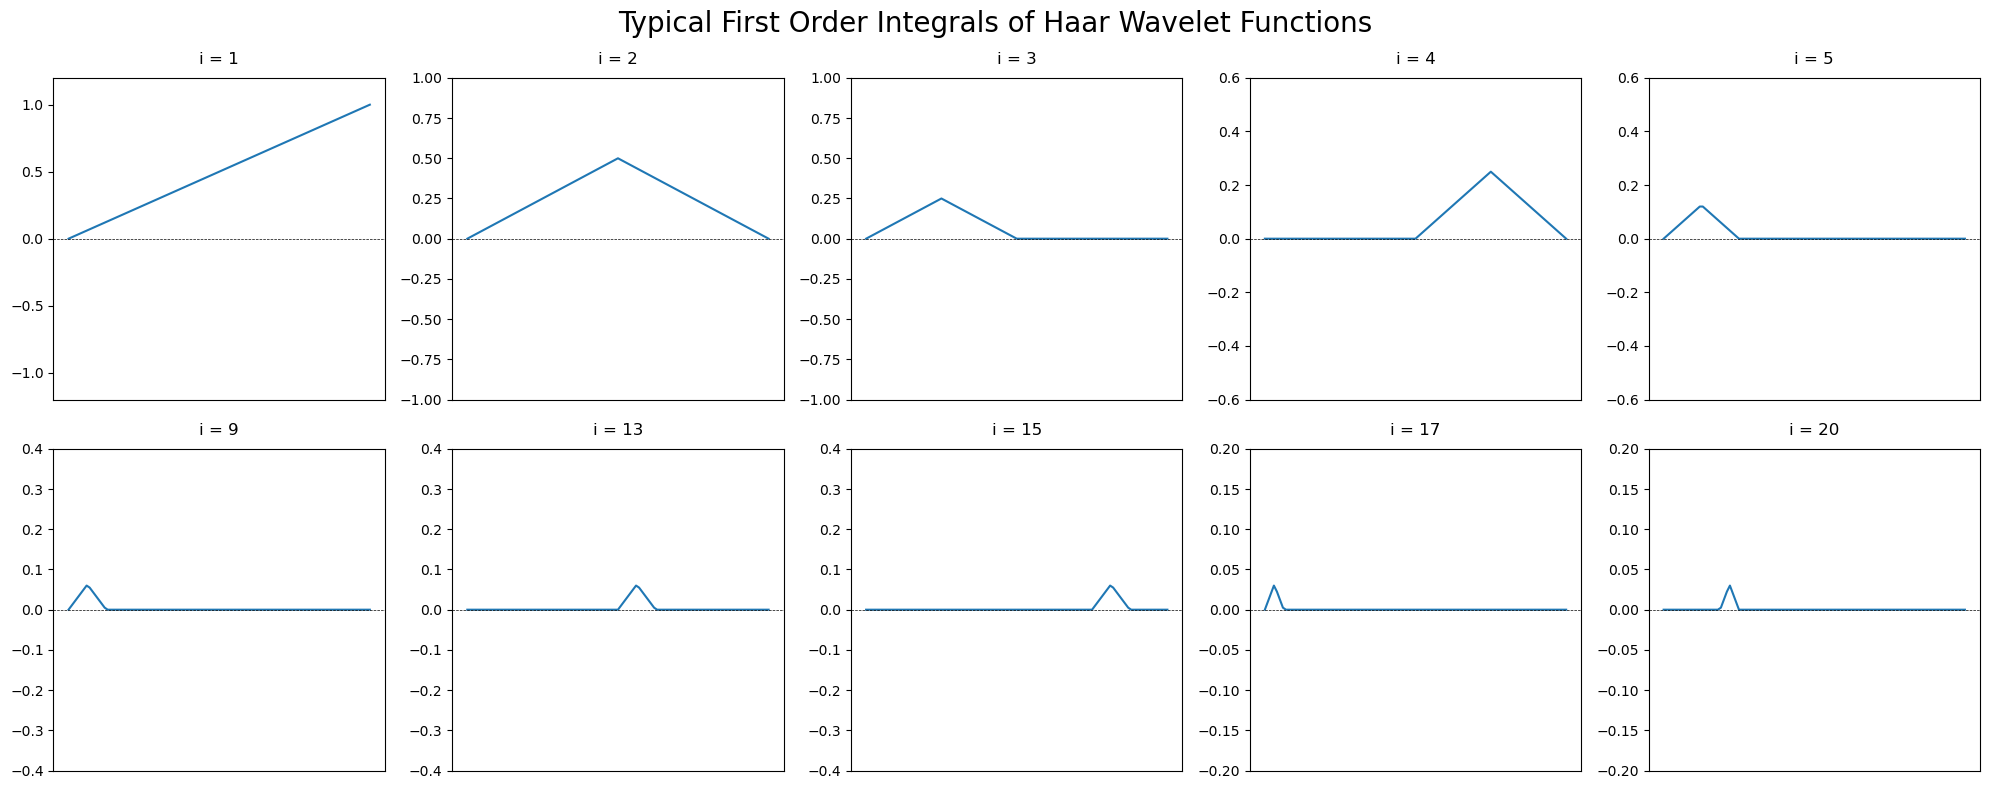

In [18]:
fig, ax = plt.subplots(2, 5, figsize=(20, 8))
x = np.linspace(0, 1, 101)
selected_indices = [1, 2, 3, 4, 5, 9, 13, 15, 17, 20]

for j, i in enumerate(selected_indices):
    ax[int(j / 5), j % 5].plot(x, haar_int_1(x, i))
    ax[int(j / 5), j % 5].get_xaxis().set_visible(False)  # hide x-axis
    ax[int(j / 5), j % 5].set_title('i = ' + str(i), pad=10)
    
    if i == 1:
        scale = 1.2
    elif 2 <= i <= 3:
        scale = 1.0
    elif 4 <= i <= 8:
        scale = 0.6
    elif 9 <= i <= 16:
        scale = 0.4
    elif 17 <= i <= 20:
        scale = 0.2
    
    ax[int(j / 5), j % 5].set_ylim(-scale, scale)
    ax[int(j / 5), j % 5].axhline(y=0, color='k', linewidth=0.5, linestyle='--')

fig.suptitle('Typical First Order Integrals of Haar Wavelet Functions', fontsize=20)
plt.tight_layout()
plt.savefig('Haars_int1.png', dpi=300)

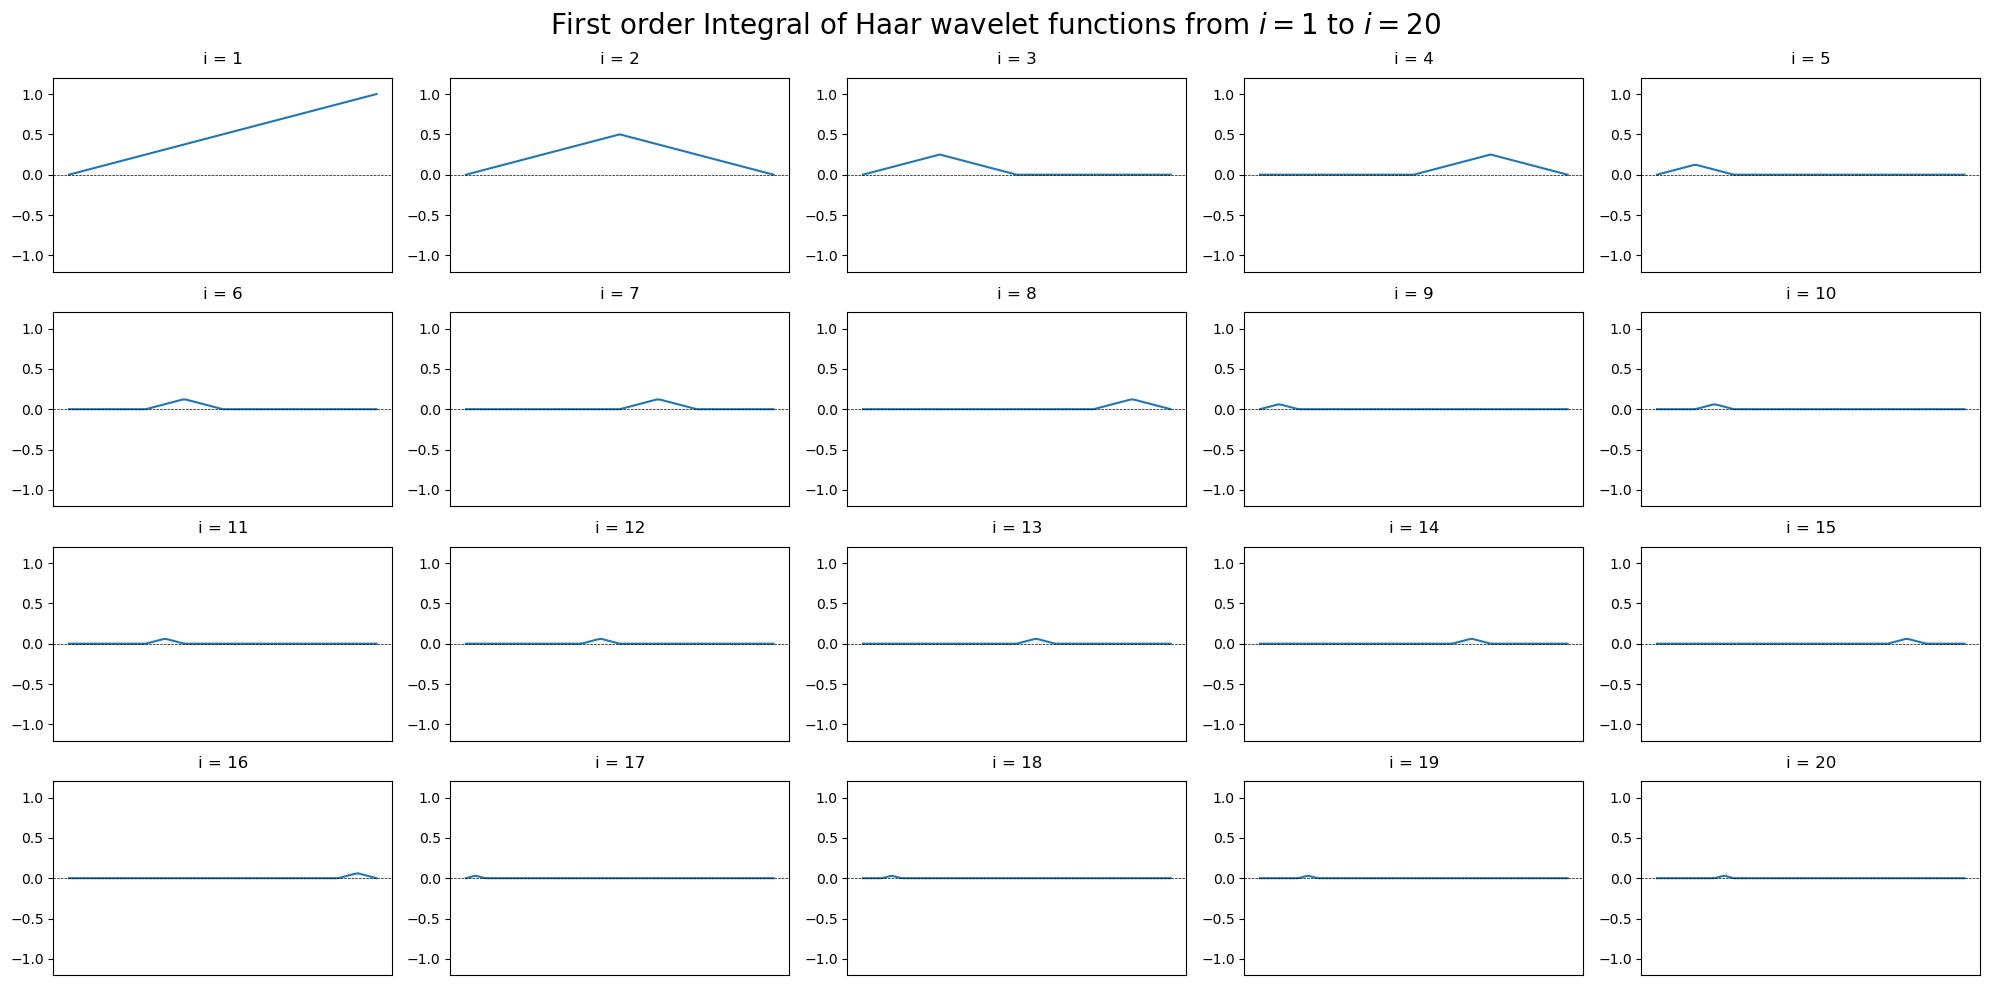

In [8]:
# check the integration of the Haar wavelet function
fig, ax = plt.subplots(4, 5, figsize=(20, 10))
x = np.linspace(0, 1, 101)
for i in range(1, 21):
    ax[int((i - 1) / 5), (i - 1) % 5].plot(x, haar_int_1(x, i))
    ax[int((i - 1) / 5), (i - 1) % 5].get_xaxis().set_visible(False) # make x-axis do not show
    ax[int((i - 1) / 5), (i - 1) % 5].set_title('i = ' + str(i), pad=10)
    ax[int((i - 1) / 5), (i - 1) % 5].set_ylim(-1.2, 1.2)
    ax[int((i - 1) / 5), (i - 1) % 5].axhline(y=0, color='k', linewidth=0.5, linestyle='--')
fig.suptitle('First order Integral of Haar wavelet functions from $i = 1$ to $i = 20$', fontsize=20)
plt.tight_layout()
plt.savefig('Haars_int1.png', dpi=300)

In [19]:
def haar_int_2(x, i):
    """
    x: input vector
    i: the index of the Haar wavelet function

    return: the second-order integration of the Haar wavelet function
    """
    if i == 1:
        return 0.5 * x ** 2
    if i >= 2:
        int_1 = haar_int_1(x, i)
        int_2 = np.zeros(len(x))
        for j in range(len(x)):
            int_2[j] = np.trapz(int_1[:j+1], x[:j+1])
        return int_2

In [20]:
# define the function for second-order integration of the Haar wavelet function
def haar_int_2(x, i):
    """
    x: input vector
    i: the index of the Haar wavelet function

    return: the second-order integration of the Haar wavelet function
    """
    if i == 1:
        return 0.5 * x ** 2
    if i >= 2:
        j, k = index(i) # j is the scale, k is the translation
        m = 2 ** j
        alpha = k / m
        beta = (k + 0.5) / m
        gamma = (k + 1) / m
        a = 1. * (x>=alpha) * (x<beta) * (x - alpha) ** 2 / 2
        b = -1. * (x>=beta) * (x<=gamma) * ((x - gamma) ** 2 / 2 - (beta - alpha) ** 2)
        c = 1. * (x > gamma) * (x <= 1) * (beta - alpha) ** 2
        if i != 0 and (i & (i - 1)) == 0: # if i is power of 2
            c = 0
        int_2 = a + b + c
        return int_2

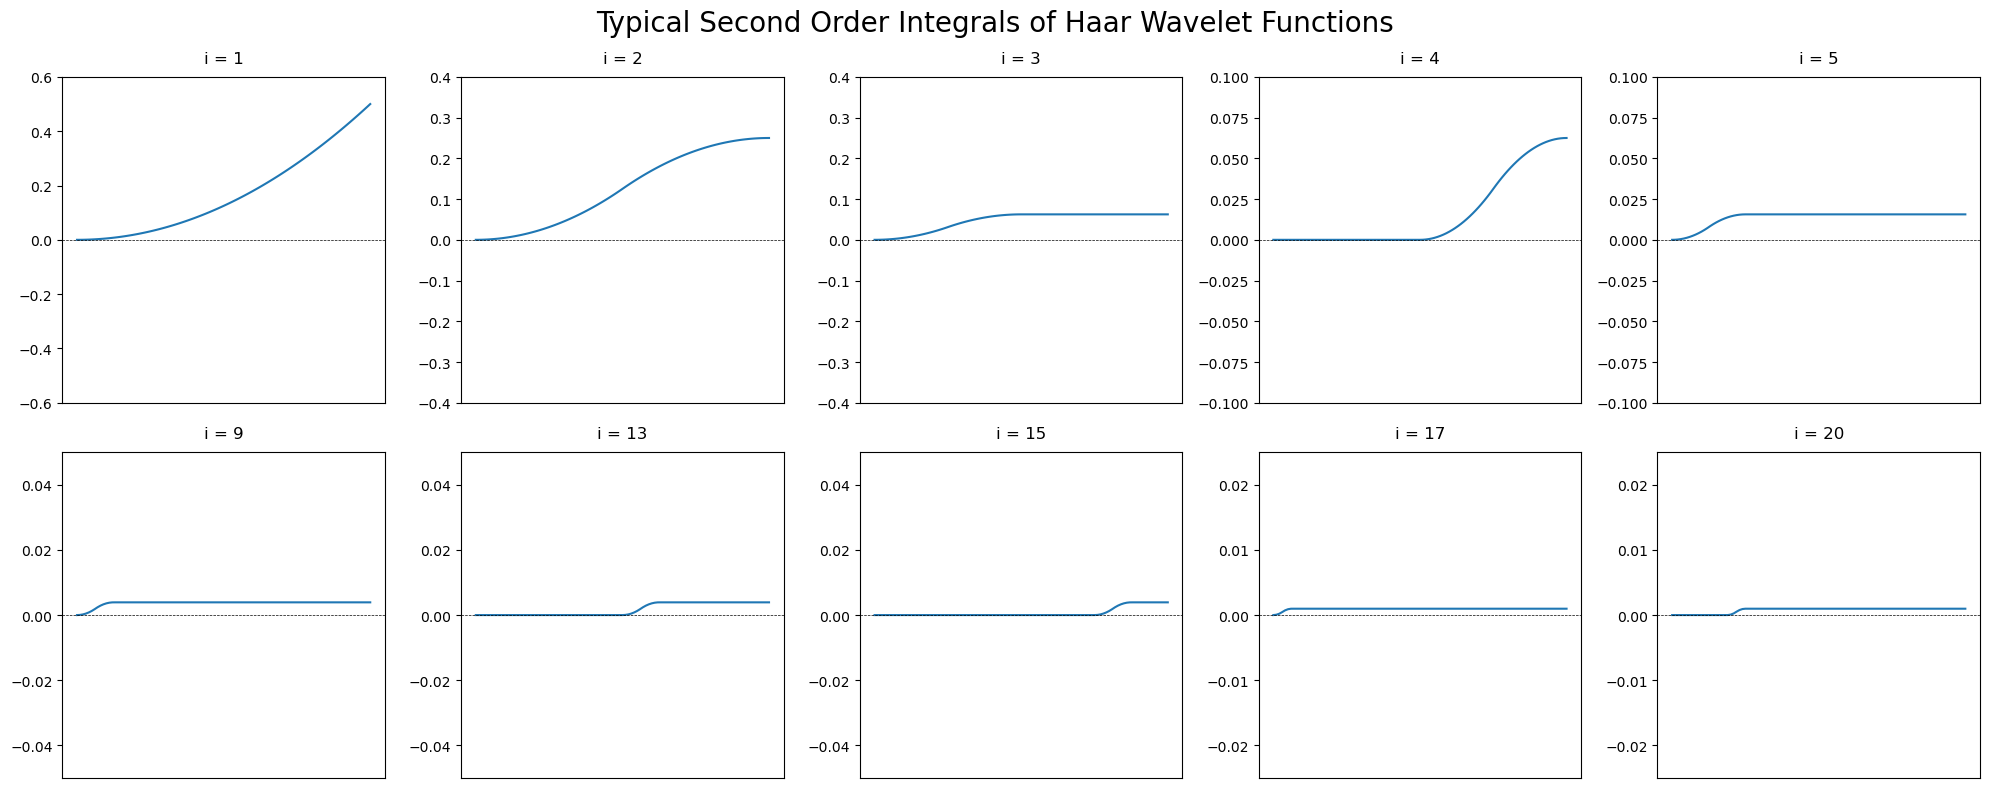

In [24]:
fig, ax = plt.subplots(2, 5, figsize=(20, 8))
x = np.linspace(0, 1, 101)
selected_indices = [1, 2, 3, 4, 5, 9, 13, 15, 17, 20]

for j, i in enumerate(selected_indices):
    ax[int(j / 5), j % 5].plot(x, haar_int_2(x, i))
    ax[int(j / 5), j % 5].get_xaxis().set_visible(False)  # hide x-axis
    ax[int(j / 5), j % 5].set_title('i = ' + str(i), pad=10)
    
    if i == 1:
        scale = 0.6
    elif 2 <= i <= 3:
        scale = 0.4
    elif 4 <= i <= 8:
        scale = 0.1
    elif 9 <= i <= 16:
        scale = 0.05
    elif 17 <= i <= 20:
        scale = 0.025
    
    ax[int(j / 5), j % 5].set_ylim(-scale, scale)
    ax[int(j / 5), j % 5].axhline(y=0, color='k', linewidth=0.5, linestyle='--')

fig.suptitle('Typical Second Order Integrals of Haar Wavelet Functions', fontsize=20)
plt.tight_layout()
plt.savefig('Haars_int2.png', dpi=300)

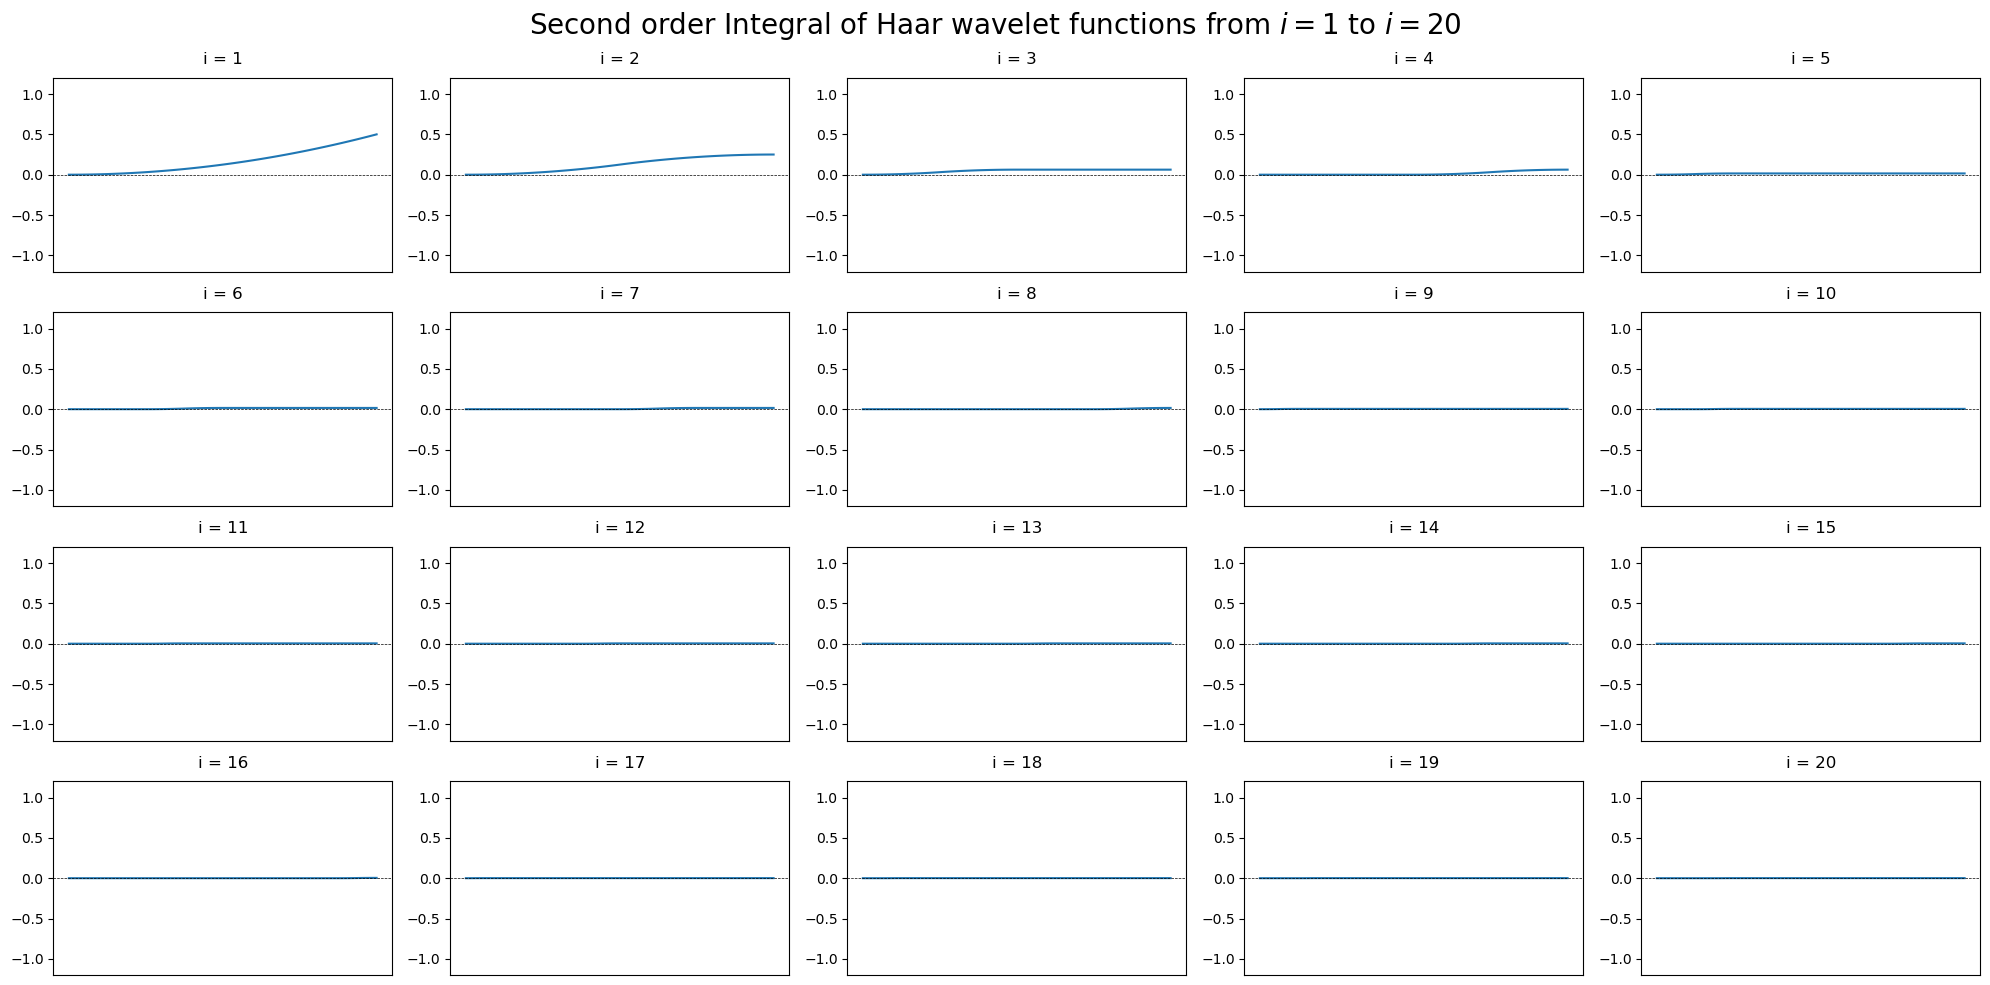

In [11]:
# check the second-order integration of the Haar wavelet function
fig, ax = plt.subplots(4, 5, figsize=(20, 10))
x = np.linspace(0, 1, 101)
for i in range(1, 21):
    ax[int((i - 1) / 5), (i - 1) % 5].plot(x, haar_int_2(x, i))
    ax[int((i - 1) / 5), (i - 1) % 5].get_xaxis().set_visible(False) # make x-axis do not show
    ax[int((i - 1) / 5), (i - 1) % 5].set_title('i = ' + str(i), pad=10)
    ax[int((i - 1) / 5), (i - 1) % 5].set_ylim(-1.2, 1.2)
    ax[int((i - 1) / 5), (i - 1) % 5].axhline(y=0, color='k', linewidth=0.5, linestyle='--')
fig.suptitle('Second order Integral of Haar wavelet functions from $i = 1$ to $i = 20$', fontsize=20)
plt.tight_layout()
plt.savefig('Haars_int2.png', dpi=300)

In [29]:
# define the function for second-order integration of the Haar wavelet function
def haar_int_2_mod(x, i):
    """
    x: input vector
    i: the index of the Haar wavelet function

    return: the second-order integration of the Haar wavelet function
    """
    if i == 1:
        return 0.5 * x ** 2
    if i >= 2:
        j, k = index(i) # j is the scale, k is the translation
        m = 2 ** j
        alpha = k / m
        beta = (k + 0.5) / m
        gamma = (k + 1) / m
        a = 0 * (x<alpha)
        b = 1. * (x>=alpha) * (x<beta) * (x - alpha) ** 2 / 2
        c = 1. * (x>=beta) * (x<gamma) * (-(x - gamma) ** 2 / 2 + 1/(4 * m ** 2))
        d = 1. * (x>=gamma) * (x<= 1) * (1/(4 * m ** 2))
        int_2 = a + b + c + d
        return int_2

In [44]:
x = np.linspace(0, 1, 1001)
# check if all zeros
diff = haar_int_2_mod(x, i) - haar_int_2(x, i) 
np.max(np.abs(diff))

0.0